In [2]:
from sage.coding.code_bounds import *

def complementaire(I, n):
    return set([1..n]).difference(I)

def canal(x, nb_err, K):
    n = len(x)
    I = Subsets(n,nb_err).random_element()
    y = []
    for i in range(n):
        y.append(x[i])
        if i+1 in I:
            err = 0
            while err == 0:
                err = K.random_element()
            y[i] += err
    return vector(GF(q),y)
 
 
    
n = 7
k = 4
q = 2

S = Subsets(n,k)

K.<g> = GF(q)



#Entrées : 
#      - matrice de parité H
#      - vecteur syndrome s
#      - w dans [0,n]
#Sortie : 
#      - vecteur d'erreur e tel que He^T=s et |e|<w

def Prange(H, s, w):
    p = w + 1
    while p > w:
        I = S.random_element()
        J = complementaire(I, n)
        #print(I)
        #print(J)
        Hj = H[[i for i in range(0,n-k)],[j for j in range(0,n) if (j+1) in J ]]
        if Hj.determinant() == 0:
            continue
        sj = vector(K,s)
        Hinv = Hj.inverse()
        sp = Hinv*sj
        #print(sp)
        p = sp.hamming_weight()
    j = 0
    e = []
    for i in range(n):
        if i + 1 in J:
            e.append(sp[j])
            j+= 1
        else:
            e.append(0)
    return vector(K,e);

def complexity(n, k, q, w ):
    R = k/n
    return q^(n*(min(1 - R,entropy(w, q)) - (1-R)*entropy(w/(1-R), q)))
 

In [3]:
H = Matrix(K,[[1,0,1,1,1,0,0],[1,1,0,1,0,1,0],[0,1,1,1,0,0,1]])
s = [1,1,0]
w = 1
print(H)
e = Prange(H, s, w)
print(e)

[1 0 1 1 1 0 0]
[1 1 0 1 0 1 0]
[0 1 1 1 0 0 1]
(1, 0, 0, 0, 0, 0, 0)


# Test :

In [4]:
G = Matrix(GF(q),[[1,0,0,0,1,1,0],[0,1,0,0,0,1,1],[0,0,1,0,1,0,1],[0,0,0,1,1,1,1]])
print("G:\n",G)
print("H:\n",H)
m = vector(GF(q),[1,0,0,0])
c = m*G
print("mot de code c :" ,c)
u = canal(c, 1, K)
print("Mot reçu avec une erreur :", u)
s = H*u
print("Syndrôme obtenu :",s)
e = Prange(H, s, w)
print("Erreur trouvée :", e)
cp = u + e
print("Mot décodé :",cp)
print("Mot bien décodé:", cp == c)

G:
 [1 0 0 0 1 1 0]
[0 1 0 0 0 1 1]
[0 0 1 0 1 0 1]
[0 0 0 1 1 1 1]
H:
 [1 0 1 1 1 0 0]
[1 1 0 1 0 1 0]
[0 1 1 1 0 0 1]
mot de code c : (1, 0, 0, 0, 1, 1, 0)
Mot reçu avec une erreur : (0, 0, 0, 0, 1, 1, 0)
Syndrôme obtenu : (1, 1, 0)
Erreur trouvée : (1, 0, 0, 0, 0, 0, 0)
Mot décodé : (1, 0, 0, 0, 1, 1, 0)
Mot bien décodé: True


# Test calcul de la complexité

Complexity with n =  2500  ,k =  1250  ,q =  2  ,w =  0.100000000000000  : 
 2.00373216355136e81


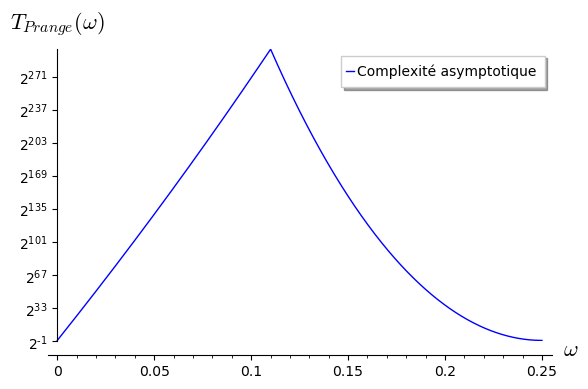

In [8]:
n = 2500
R = 0.5
k = floor(R*n)
q = 2
w_max = (1-R)*(1-1/q)
w = 0.1
print("Complexity with n = ", n, " ,k = ", k," ,q = ", q," ,w = ", w, " : \n", complexity(n,k,q,w))
c = lambda x : q^( n*( min(1 - R , entropy( x, q )) - (1-R)*entropy( x/(1-R) , q )) )
plot(c, (0,w_max), scale = 'semilogy', base = 2, axes_labels = [r'$\omega$',r'$T_{Prange}(\omega)$'], legend_label = 'Complexité asymptotique')

#print(find_local_maximum(c, 0,w_max)) #déclenche une erreur à cause de entropy et plus particulièrement du log dans le calcul de l'entropie

